# Introduction to Molecular Mechanics/Molecular Dynamics

## What does "molecular mechanics" mean?

Computational chemistry is a field which uses calculations performed on computers to predict real world properties of molecules. 
Because we can't have "real" molecules in a computer, we have to approximate their behavior using mathematical models in simulations. 
Within the field of computational chemistry, the types of simulation are grouped into two broad categories based on the type of physics the models are based on. Quantum chemistry simulations are based on quantum mechanics (Schrodinger's equation if you have taken quantum chemistry). 
The other broad category of computational chemistry is based on **molecular mechanics**, or classical(Newtonian) physics. 
This is essentially the same kind of physics you learn in introductory physics course where you might predict the path of a ball thrown through the air. 

Quantum mechanics calculations provide a more detailed and accurate representation of molecular systems compared to molecular mechanics. 
However, they are also more computationally expensive, limiting their applicability to larger systems or longer simulation times. 
Molecular mechanics methods are most often used to study the time dependent properties of molecules. 
The figure below illustrates this trade off between accuracy and cost. The lower left corner shows simulations which use classical physics. 
They are less computationally "expensive", but also less detailed. The upper right represents quantum mechanics methods - they are very accurate, but also very expensive. This workshop focuses on molecular mechanics simulations.
<div style="text-align: center;">
  <img src="images/simulation-scale.png" height="500">
</div>


## The "force field"

As stated above, all computational simulations depend on a mathematical model to describe the molecule. 
In molecular mechanics, the full expression of this model is often called a **force field**  and is a function which describes the potential energy of a system. 
This force field describes the energy associated with molecular movements such as bond stretching, angle bending, or dihedral angle rotation. 
If you are a chemistry student, you have likely discussed many of these molecular motions in your classes (who can forget talking about the cis-trans isomerism of butane in organic chemistry class?). 
The force field describes the energies associated with these movements mathematically. The potential energy is commonly represented by the letter $U$, and the total potential energy or "force field" is the sum of terms related to bond stretching, angle bending, torsional rotation (that cis-trans isomerism), electrostatic interaction, and nonbonded Van der Waals interactions.

$$ U = U_{bond} + U_{angle} + U_{torsion} + U_{elec} + U_{vdw} $$

Below we show commonly used forms from these terms. You will recognize many of these from other classes you have taken:

### Bonds and Angles:
$$ U_{bond} = \frac{1}{2}k_{l}(l-l_{eq})^2 $$

$$ U_{angle} = \frac{1}{2}k_{\theta}(\theta - \theta_{eq})^2 $$

Note that both bonds and angles are commonly described using a harmonic potential (also used to describe spring-mass systems.) 
This should look familiar to your last homework assignment!
The variable $l$ represents the distance between two bonded atoms. The parameters $k_{l}$ and $l_{eq}$ represent the bond stiffness and equilibrium bond length respectively. 
For example, two double bonded carbons will have a shorter bond length ($l_{eq}$) and stiffer bond (stiffer spring, or higher $k_{l}$) than single bonded carbons.

### Torsional (Dihedral) Interactions:

$$ U_{torsion} = \sum_{n=1}^{n_{max}}{U_{n}[1+cos(n\phi-\gamma_{n})]} $$

The torsion energy, represented by $U_{torsion}$, describes the energy changes associated with the rotation around a particular bond, often visualized between four bonded atoms in sequence.
This term is especially significant in cases like rotatable single bonds where molecules can adopt different conformations based on the dihedral angles.
The variable $\phi$ represents the torsional (or dihedral) angle, which is the angle between two intersecting planes formed by three atoms each.
The parameters $U_{n}$ and $\gamma_{n}$ provide amplitude and phase shift respectively.
This trigonometric expression captures the periodic nature of torsional potentials, indicating that after completing a full rotation (360°), the molecule returns to its original state.

### Electrostatic Interactions:

$$ U_{elec} = k_{e}\frac{q_{i}q_{j}}{r_{ij}} $$

The term $U_{elec}$ encapsulates the interactions between charged species within a molecular system.
As the name suggests, it's based on the fundamental principles of electrostatics: opposite charges attract, while like charges repel.
The variables $q_{i}$ and $q_{j}$ represent the charges on atoms i and j, respectively, and $r_{ij}$ is the distance between them.
The constant $k_{e}$ is a proportionality factor that relates to the physical constants of the system.
In essence, this term is a manifestation of Coulomb's Law at the molecular level, accounting for the forces exerted between charged entities in the molecule.

### Van der Waals Interactions:

$$ U_{vdw} = 4\epsilon_{ij}[(\frac{\sigma_{ij}}{r_{ij}})^{12} - (\frac{\sigma_{ij}}{r_{ij}})^{6}] $$

These are non-covalent interactions that occur between all atoms and molecules, irrespective of their charge.
$U_{vdw}$ quantifies these weak forces that primarily consist of attractions and repulsions due to transient fluctuations in electron density around atoms.
The equation is formulated using the Lennard-Jones potential, which models the balance between attraction at longer distances (represented by the $(\frac{\alpha_{ij}}{r_{ij}})^{6}$ term) and repulsion at shorter distances (captured by the $(\frac{\alpha_{ij}}{r_{ij}})^{12}$ term).
Here, $\epsilon_{ij}$ provides the depth of the potential well, indicating the strength of the attraction, and $\alpha_{ij}$ represents the finite distance at which the inter-particle potential is zero.
As two atoms approach each other, they first attract weakly, then strongly, but once they get too close, they experience a strong repulsive force due to overlapping electron clouds.


## Exploring Potential Energy Equations

We have already seen the equations for Van der Waals interactions in Chem 280 - this is the Lennard Jones equation that we used for our Monte Carlo simulation.
We have also already seen the harmonic bond potential - this was the equation we used to model a diatomic molecule in our first homework!

In this section, we will examine parameters that can be used with the force field equations above to describe carbon-carbon and carbon-hydrogen bonds.

| Interaction       | Parameters                                                                            |
|-------------------|---------------------------------------------------------------------------------------|
|C-C bond           | $l_{eq} = 0.1538 nm$, $k_{l} = 1.946 x 10^5 kJ/mol \cdot nm^2$                    |
|C-H bond           | $l_{eq} = 0.1097 nm$, $k_{l} = 3.146 x 10^6 kJ/mol \cdot nm^2$                    |
|H-C-H angle        | $\theta_{eq} = 1.878$ $rad$, $k_{\theta} = 326.0 kJ/mol \cdot rad^2$            |
|H-C-C angle        | $\theta_{eq} = 1.916$ $rad$, $k_{\theta} = 391.8 kJ/mol \cdot rad^2$            |
|H-C-C-H torsion    | $\gamma_{3} = 0$ $rad$, $U_{3} = 0.5021 kJ/mol$                                 |
|C atom (nonbonded) | $q_{C} = -0.0951e$, $\alpha_{C} = 0.3398 nm$, $\epsilon_{C} = 0.4510 kJ/mol$|
|H atom (nonbonded) | $q_{H} = 0.0317e$, $\alpha_{H} = 0.2600$ nm$, $\epsilon_{H} = 0.0870 kJ/mol$ |
|C-C-C angle        | $\theta_{eq} = 1.946$ $rad$, $k_{\theta} = 543.0 kJ/mol \cdot rad^2$            |
|C-C-C-C torsion    | $\gamma_{1} = 0$ $rad$, $U_{1} = 0.4602 kJ/mol$, $\gamma_{2} = 3.146$ $rad$, $U_{2} = 1.2134 kJ/mol$, $\gamma_{3} = 0$ $rad$, $U_{3} = 0.5439 kJ/mol$    |

### Harmonic Bond Potential

The harmonic bond potential is plotted for you.

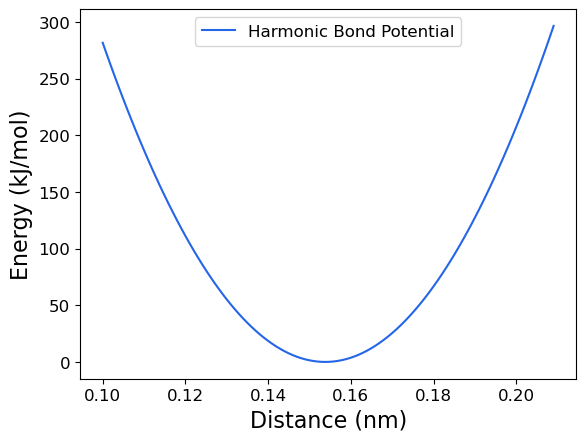

In [25]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.946E5
l_eq = 0.1538

# our equilibrium bond lenght is 0.1538 nm, so we will 
# generate distances around this length.
distances = np.arange(0.1, 0.21, 0.001)

# can use broadcasting/element-wise operation feature
# of numpy arrays to avoid loops.
# use bond potential ( 0.5 * k * (bond_length - equilibrium_length) ** 2) here.
bond_energies = 0.5 * k * (distances - l_eq)**2

# Create a nice plot
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(distances, bond_energies, label="Harmonic Bond Potential", color="#2565E8")
ax.set_ylabel(r'Energy (kJ/mol)', fontsize=16)
ax.set_xlabel(r'Distance (nm)', fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.legend(fontsize=12)

plt.savefig('bond_potential.png', dpi=300)


## Exercise 

Create a plot for the C-C-C harmonic angle potential. Consider angles from 0 to 2 $\pi$. Save your plot as `angle_potential.png`.

In [26]:
## Your solution here!

## Exercise

Create a plot for the C-C-C-C torsion potential. Plot the potential on the range 0 to 4 $\pi$. Save your plot as `dihedral_potential.png`.

$$ U_{torsion} = \sum_{n=1}^{n_{max}}{U_{n}[1+cos(n\phi-\gamma_{n})]} $$

In [23]:
## Your solution here